In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [2]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer

In [4]:
import pandas as pd                                                        #for data manipulation
import numpy as np                                                         #for numerical operations
from matplotlib import pyplot as plt                                       #for visualization
import seaborn as sns                                                      #for visualization
from sklearn.ensemble import RandomForestClassifier                        #for using Random forest Classifier algorithm
from sklearn.metrics import accuracy_score

In [5]:
X_train = pd.read_csv('X_train.csv')

In [6]:
X_test = pd.read_csv('X_test.csv')

In [7]:
y_train = pd.read_csv('y_train.csv')

In [8]:
y_test = pd.read_csv('y_test.csv')

In [9]:
n_estimators=10
base_models = []

In [10]:
for i in range(n_estimators):
    rf = RandomForestClassifier(n_estimators=200)
    rf.fit(X_train, y_train)
    base_models.append(rf)

In [12]:
predictions = [model.predict(X_test) for model in base_models]

In [13]:
y_pred_rf = np.round(np.mean(predictions, axis=0))

In [14]:
ensemble_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Ensemble Accuracy: {ensemble_accuracy}")

Ensemble Accuracy: 0.7222222222222222


In [15]:
LRModel=LogisticRegression(solver='lbfgs', max_iter=7600)
LRModel.fit(X_train,y_train)

LogisticRegression(max_iter=7600)

In [16]:
y_pred_lr = LRModel.predict(X_test)

In [17]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
import tensorflow as tf

# Giải phóng bộ nhớ GPU
tf.keras.backend.clear_session()

In [20]:
model.fit(X_train, y_train, epochs = 150, batch_size=15, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5349 - loss: 13.0298 - val_accuracy: 0.4646 - val_loss: 0.8899
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5131 - loss: 2.6934 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4811 - loss: 1.4201 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5354 - loss: 1.3447 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4856 - loss: 0.9790 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4913 - loss: 0.9630 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4833 - loss: 0.8152 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4912 - loss: 0.8509 - val_accuracy: 0.5000 -

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Khởi tạo dictionary để lưu kết quả
metrics_dict = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# 1. Random Forest
metrics_dict['Model'].append('Random Forest')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_rf))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_rf))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_rf))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_rf))

# 2. Logistic Regression
metrics_dict['Model'].append('Logistic Regression')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_lr))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_lr))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_lr))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_lr))

# 3. Neural Network
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32") # Dự đoán với mạng nơ-ron
metrics_dict['Model'].append('Neural Network')
metrics_dict['Accuracy'].append(accuracy_score(y_test, y_pred_nn))
metrics_dict['Precision'].append(precision_score(y_test, y_pred_nn))
metrics_dict['Recall'].append(recall_score(y_test, y_pred_nn))
metrics_dict['F1-Score'].append(f1_score(y_test, y_pred_nn))

# Chuyển đổi dictionary thành DataFrame để hiển thị kết quả
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.722222   0.789474  0.606061  0.685714
1  Logistic Regression  0.681818   0.687500  0.666667  0.676923
2       Neural Network  0.722222   0.715686  0.737374  0.726368


<Figure size 1000x600 with 0 Axes>

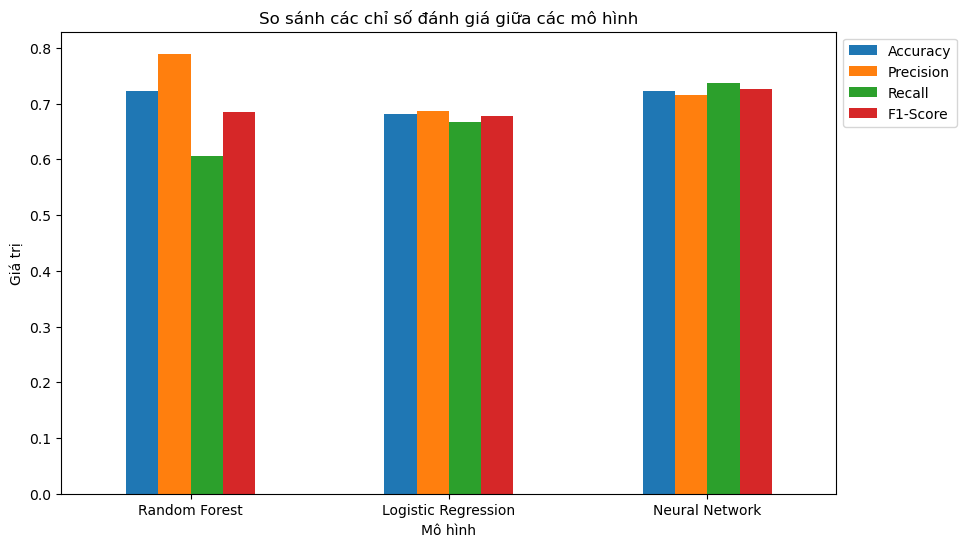

In [22]:
import matplotlib.pyplot as plt

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))

# Tạo biểu đồ cột cho từng chỉ số đánh giá
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), rot=0)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('So sánh các chỉ số đánh giá giữa các mô hình')
plt.ylabel('Giá trị')
plt.xlabel('Mô hình')

# Hiển thị biểu đồ
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
